# CIFAR-10 Image Classification — LeNet-style CNN


## 1 — Imports

In [3]:
# Step 1: Importing the necessary libraries.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## 2 — Load & preprocess CIFAR-10

This cell downloads CIFAR-10 (handled by Keras) and normalizes images.

In [6]:
# Step 2: Loading and pre-processing of the CIFAR-10 dataset.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [8]:
# Step 3: Normalizing pixel values to be between 0 and 1.
train_images = train_images.astype('float32') / 255.0
test_images  = test_images.astype('float32') / 255.0

In [10]:
# Step 4: One-hot encode the labels.
# This step is required to use the loss function "categorical_crossentropy".
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

## 3 — Class names & sample visualization

In [13]:
# Step 5: Defining the class names for CIFAR-10 images.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


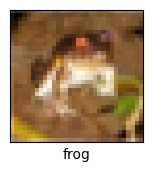

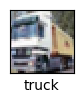

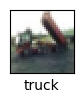

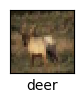

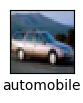

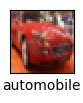

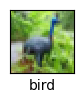

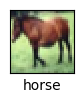

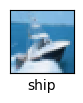

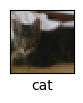

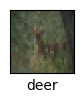

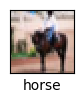

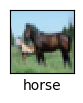

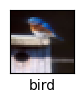

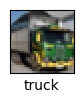

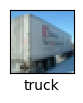

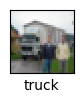

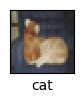

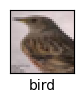

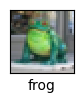

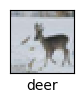

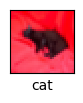

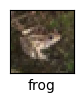

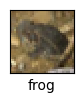

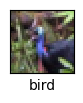

In [15]:
# Step 6: Visualizing a few training images from the CIFAR-10 dataset.
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i].argmax()]) # Using argmax to get the label index
    plt.show()

## 4 — Model (LeNet-style)

In [18]:
# Step 7: Building the CNN model (LeNet-5 CNN Architecture).
model = models.Sequential([
layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)),
layers.AveragePooling2D((2, 2)),
layers.Conv2D(16, (5, 5), activation='relu'),
layers.AveragePooling2D((2, 2)),
layers.Conv2D(120, (5, 5), activation='relu'),
layers.Flatten(),
layers.Dense(84, activation='relu'),
layers.Dense(10, activation='softmax')
])

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Step 8: Printing the model summary.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

## 5 — Compile

In [23]:
# Step 9: Compiling the CNN model.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])# Adam uses a default learning rate of 0.001

## 6 — Training

In [26]:
# # Data augmentation using ImageDataGenerator (real-time augmentation)
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
#     zoom_range=0.1
# )

# # Fit on training data (not strictly necessary for CIFAR but safe)
# datagen.fit(train_imgs)

# # Example usage: use datagen.flow(...) in model.fit
# # We'll modify the training cell to use datagen.flow(train_imgs, train_lbls_cat, batch_size=...)
# print('Data augmentation configured.')

In [28]:
# Step 10: Training the CNN model.
# history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

batch_size = 64
epochs = 10
AUTOTUNE = tf.data.AUTOTUNE

# Create training dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(50000, seed=42)

# Augmentation
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, 0.9, 1.1)
    return image, label

train_ds = train_ds.map(augment, num_parallel_calls=AUTOTUNE)
train_ds = train_ds.batch(batch_size).prefetch(AUTOTUNE)

# Validation dataset
val_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
val_ds = val_ds.batch(batch_size).prefetch(AUTOTUNE)

# Train using tf.data
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.2986 - loss: 1.9114 - val_accuracy: 0.4481 - val_loss: 1.5287
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.4612 - loss: 1.4963 - val_accuracy: 0.4979 - val_loss: 1.3903
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5003 - loss: 1.3956 - val_accuracy: 0.5319 - val_loss: 1.3219
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step - accuracy: 0.5281 - loss: 1.3219 - val_accuracy: 0.5504 - val_loss: 1.2587
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.5517 - loss: 1.2604 - val_accuracy: 0.5678 - val_loss: 1.2272
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.5696 - loss: 1.2179 - val_accuracy: 0.5701 - val_loss: 1.2039
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5792 - loss: 1.1830 - val_accuracy: 0.5870 - val_loss: 1.1663
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.5932 - loss: 1.1455 - 

## 7 — Evaluation

In [31]:
# Step 11: Evaluating the performance of the CNN model.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy is: {test_acc}')


313/313 - 3s - 8ms/step - accuracy: 0.5858 - loss: 1.1678

Test accuracy is: 0.5857999920845032


## 8 — Training / Validation plots

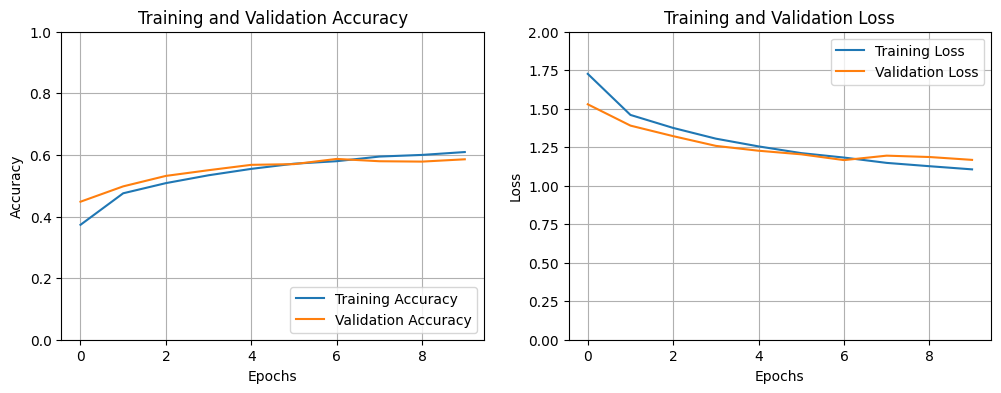

In [34]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)
# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 2]) # Adjusted y-axis limit to better visualize the loss values
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()